Based on https://www.geekstips.com/battery-life-calculator-sleep-mode/.

This version does a more liberal calculation.

---
# Motivation
This was originally on Matlab but to change values and see the results would require you to download it and run it. It was not worth the extra hassle. Thus, it is here instead. 
 
---
#Current Values
If this works, this should plot the battery life assuming the following:

> Battery: 2 AAA in Series for 3.0 to 3.2V nominal - Rated for 1200 mAh total

> Sleep cycle consumes 18mA

> Wake cycle consumes 30mA

> 2 minute uptime followed by 8 minute sleep

> Calculation includes a derate of 15% on the battery

Hours till battery is dead: 50.00 or 2.08 days


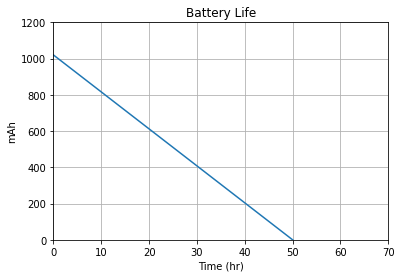

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

#Batter Capacity in mAh
batteryCap = 1200;

#Power draw in mA
wakePower = 30;
sleepPower = 18;

#Fraction on a per hour basis
wakeTime = 0.2; 
sleepTime = 0.8;

x = [];

#For loop for 0 to 70 hours 
for i in range(71): 
  x.append(i)

#Plots a linear function of battery life
x = np.asarray(x);
plt.plot(x,batteryCap*0.85- sleepPower*sleepTime*x-wakePower*wakeTime*x);
plt.xlabel("Time (hr)");
plt.ylabel("mAh");
plt.title("Battery Life");
plt.grid();
plt.axis([0,70,0,1200]);

#Solves the hour and day battery is dead.
sym.var('hour');
eqn = sym.Eq(0,batteryCap*0.85- sleepPower*sleepTime*hour-wakePower*wakeTime*hour);
hourDead = sym.solve(eqn,hour);
dayDead = hourDead[0] / 24;
print("Hours till battery is dead:","%0.2f" % hourDead[0],"or", "%0.2f" % dayDead, "days");

